## Multiple linear regression using House Price Data
< About the dataset >\
This dataset contains of house prices across the USA. It has the following colums:\
Avg. Area Income: Numerical data about the average area of the income where the house is located.\
House Age: Age of the house in years.\
Number of Rooms\
Number of Bedrooms\
Area Population: Population of the area where the house is located.\
Price\
Address: The only textual data in the dataset consisting of the address of the house.

### Steps of making Linear Regression Analysis:
1. Import dataset
2. Take sample from dataset.
3. Use pandas library to get descriptive statistics (mean. standard deviation, percentile)
4. Use pandas library to get correlation between each variable in the dataset
5. Set independent variable, x and dependent variable , y based on high correlation variables
6. Make boxplot for dependent and independent variable to check for outliers
7. Make scatterplot to see the trend between variables
8. Use statsmodels library to get linear regression model

In [1]:
# import library and packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import statistics
import statsmodels.api as sm
%matplotlib inline
np.random.seed(42)

In [2]:
# read the dataset 
house = pd.read_csv('house_price.csv')
house.head()

,Avg. Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
# view the dataset info
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4548 entries, 0 to 4547
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Avg. Area Income    4548 non-null   float64
 1   House Age           4548 non-null   float64
 2   Number of Rooms     4548 non-null   float64
 3   Number of Bedrooms  4548 non-null   float64
 4   Area Population     4548 non-null   float64
 5   Price               4548 non-null   float64
 6   Address             4548 non-null   object 
dtypes: float64(6), object(1)
memory usage: 248.8+ KB


In [4]:
# view the descriptive statistics
house.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Avg. Area Income,4548.0,6.861170e+04,10686.487761,17796.631190,61485.150192,6.881704e+04,7.582074e+04,1.077017e+05
House Age,4548.0,5.978918e+00,0.990850,2.644304,5.332187,5.960872e+00,6.658368e+00,9.519088e+00
Number of Rooms,4548.0,6.987646e+00,1.006587,3.236194,6.299692,7.002245e+00,7.665871e+00,1.075959e+01
Number of Bedrooms,4548.0,3.981693e+00,1.230939,2.000000,3.140000,4.050000e+00,4.490000e+00,6.500000e+00
Area Population,4548.0,3.618747e+04,9910.189915,172.610686,29423.163510,3.621556e+04,4.288055e+04,6.959204e+04
Price,4548.0,1.233916e+06,354567.591226,15938.657920,997775.110300,1.234571e+06,1.470616e+06,2.469066e+06


### Sampling
Take 300 sample of the house dataset by random. The dataset consist of 4500 houses.
For the purpose of study, we will use only 300 sample from the dataset.

In [5]:
# create new column 'index' and make it as index of data
# create new table from sample data
# we take average area income, house age, number of rooms, area population and price as columns

sample = house.sample(n = 300, random_state = 42)
sample['index'] = np.arange(0,300)
df = sample.loc[:,['Avg. Area Income','House Age','Number of Rooms','Area Population','Price']]
df['index'] = np.arange(0,300)
df = df.set_index('index')
columns = ['average_area_income','house_age','rooms','area_population','price']
df.columns = columns
df.head()

,average_area_income,house_age,rooms,area_population,price
index,,,,,
0,62134.02206,7.445436,6.808879,32157.13169,1.399663e+06
1,50847.11311,4.973274,5.355861,34763.70381,3.989095e+05
2,60697.35154,6.170484,7.150537,28140.96709,7.439998e+05
3,63700.88828,6.534635,6.014719,52554.41103,1.312467e+06
4,74411.05989,5.534628,7.210123,43537.50295,1.393747e+06


### Correlation
Calculate the correlation between all independent variable and dependent variable.\
There is high correlation betweem previous exam score and student's performance score

<Axes: >

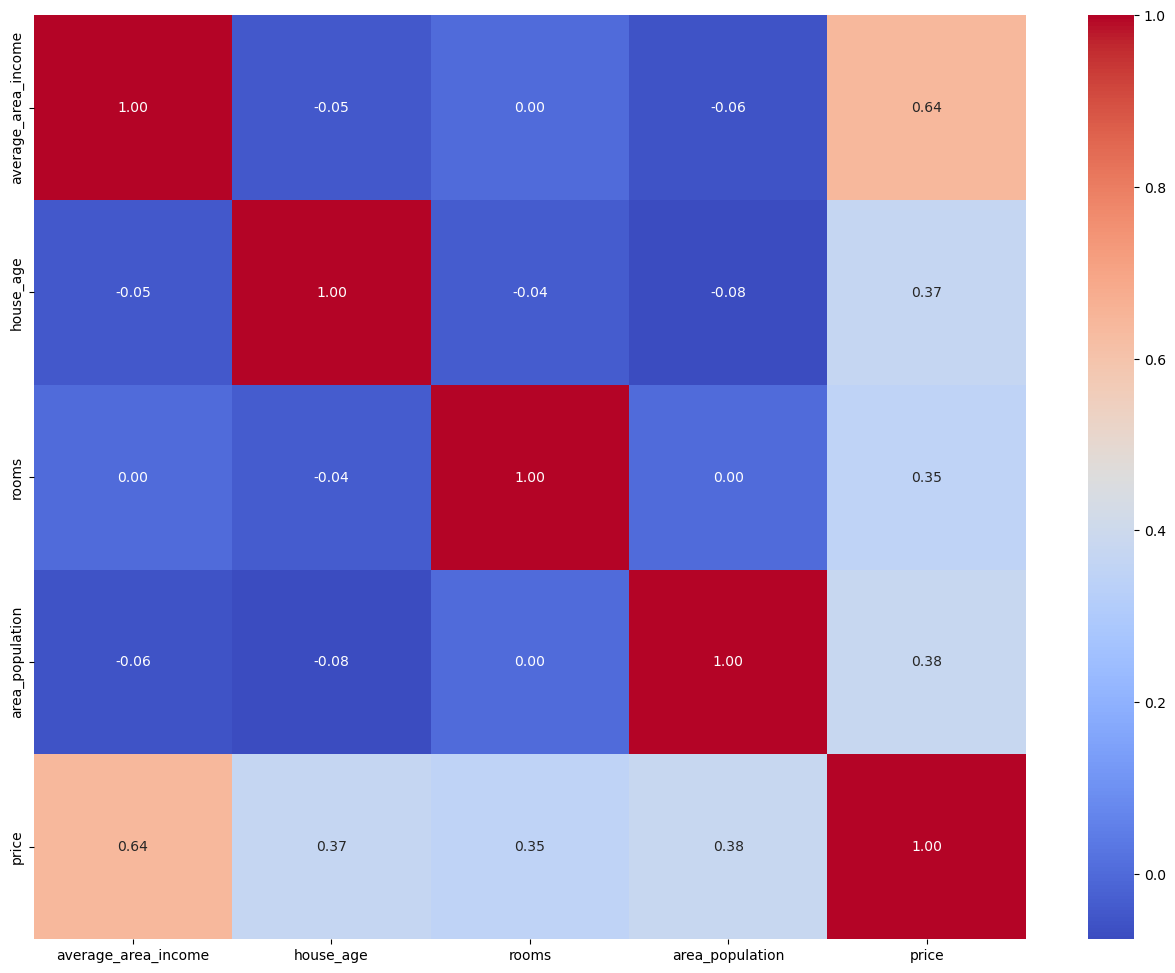

In [6]:
# calculate correalation
plt.figure(figsize = (16,12))
sns.heatmap(data = df.corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

### Descriptive Statistics
count, mean, median, std dev, and percentile of the dataset

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
average_area_income,300.0,6.923584e+04,11051.218008,38139.919040,6.254746e+04,6.960565e+04,7.614142e+04,1.077017e+05
house_age,300.0,5.910647e+00,0.948757,3.105751,5.346616e+00,5.876121e+00,6.560029e+00,8.137214e+00
rooms,300.0,6.948565e+00,1.015735,3.950225,6.313440e+00,6.963965e+00,7.652472e+00,1.002438e+01
area_population,300.0,3.647513e+04,10011.239561,12450.578470,2.877811e+04,3.616225e+04,4.349046e+04,6.318461e+04
price,300.0,1.239935e+06,346905.446881,353240.054700,1.025323e+06,1.240684e+06,1.439968e+06,2.332111e+06


### Boxplot
See if there is any outlier in the dataset\
Only average_area_income and area_population is used for independent variable

In [8]:
# set independent and dependent variable
x1 = df["average_area_income"]
x2 = df["area_population"]
y = df['price']

{'whiskers': [<matplotlib.lines.Line2D at 0x1bf0d9facb0>,
 'caps': [<matplotlib.lines.Line2D at 0x1bf0d9fb1f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bf0d9faa10>],
 'medians': [<matplotlib.lines.Line2D at 0x1bf0d9fb730>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bf0d9fb9d0>],
 'means': []}

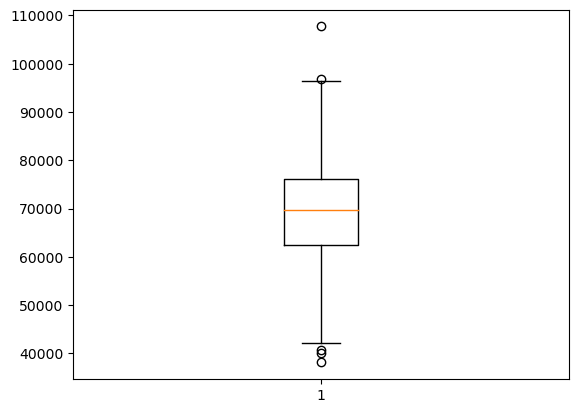

In [9]:
# box plot for average area income
plt.boxplot(x1)

{'whiskers': [<matplotlib.lines.Line2D at 0x1bf0da7a9b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1bf0da7aef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bf0da7a710>],
 'medians': [<matplotlib.lines.Line2D at 0x1bf0da7b430>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bf0da7b6d0>],
 'means': []}

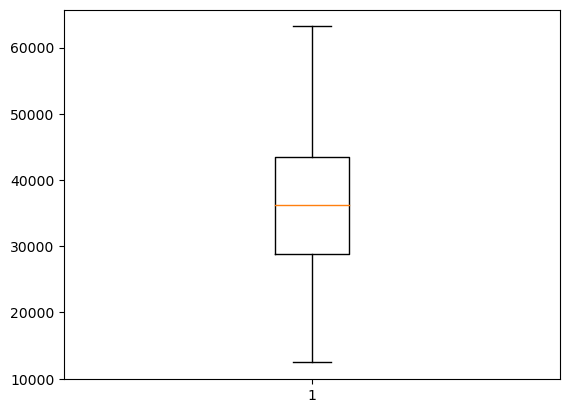

In [10]:
# box plot for area population
plt.boxplot(x2)

{'whiskers': [<matplotlib.lines.Line2D at 0x1bf0c305d80>,
 'caps': [<matplotlib.lines.Line2D at 0x1bf0c306320>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bf0c305ae0>],
 'medians': [<matplotlib.lines.Line2D at 0x1bf0c306800>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bf0c3069e0>],
 'means': []}

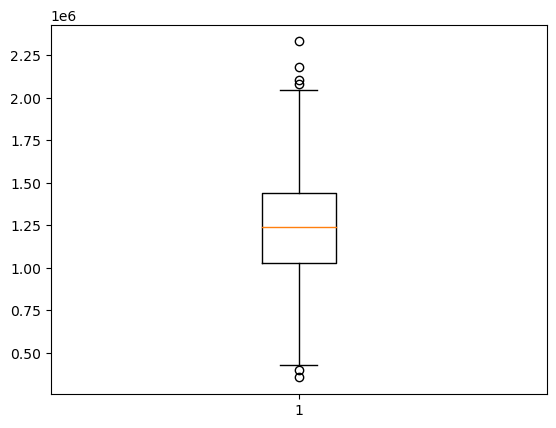

In [11]:
# boxplot for house price
plt.boxplot(y)

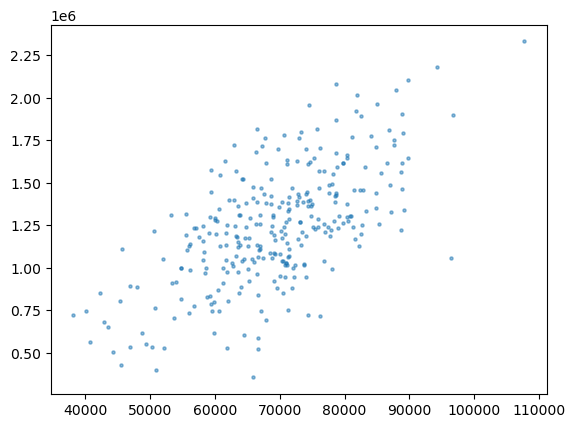

In [12]:
# make scatter plot for x1 and y
plt.scatter(x1, y, s = 5, alpha = 0.5 )

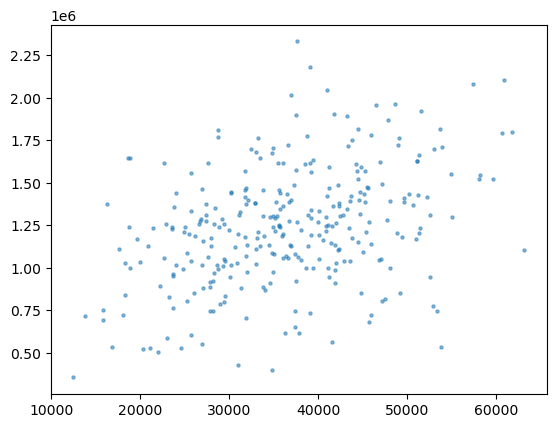

In [13]:
# make scatter plot for x2 and y
plt.scatter(x2, y, s = 5, alpha = 0.5 )

### Multiple Linear Regression using statsmodels
Stats model use Ordinary Least Square method that allow us to find the best line that describe the relationship between one or more predictor available and a response variable.

Statsmodels follows largely the traditional model where we want to know how well a given model fits the data, and what variables "explain" or affect the outcome, or what the size of the effect is. Scikit-learn follows the machine learning tradition where the main supported task is chosing the "best" model for prediction.

In [14]:
# add constant to predictor variable
X = df[["average_area_income","area_population"]]
X = sm.add_constant(X)

#fit linear regression model
model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     209.9
Date:                Fri, 15 Sep 2023   Prob (F-statistic):           1.53e-57
Time:                        23:36:23   Log-Likelihood:                -4120.1
No. Observations:                 300   AIC:                             8246.
Df Residuals:                     297   BIC:                             8257.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -7.353e+05   9

In [15]:
# get important statistical valur from the model
# r-squared
print('The model accuracy is', round(model.rsquared,4))
# model parameter
print('The model parameter is:\n', model.params)
# model standard error (root mean squared error)
print('The model standard error is', model.scale**0.5)
# model equation
print(f'The model equation is y = {model.params.average_area_income}X1 + {model.params.area_population}X2 {model.params.const}' )

The model accuracy is 0.5856
The model parameter is:
 const                 -735266.379685
average_area_income        20.872802
area_population            14.531959
dtype: float64
The model standard error is 224062.0326096648
The model equation is y = 20.872801996189786X1 + 14.531958821085716X2 -735266.3796847676


In [20]:
# the meaning behind coefficient value
# average area income
print(f'For every $100 increase in average area income, the house price will increase ${round(model.params.average_area_income * 100)}')

# area population
print(f'FOe every 100 people increase in area population, the house price will increase ${round(model.params.area_population * 100)}')

For every $100 increase in average area income, the house price will increase $2087
FOe every 100 people increase in area population, the house price will increase $1453


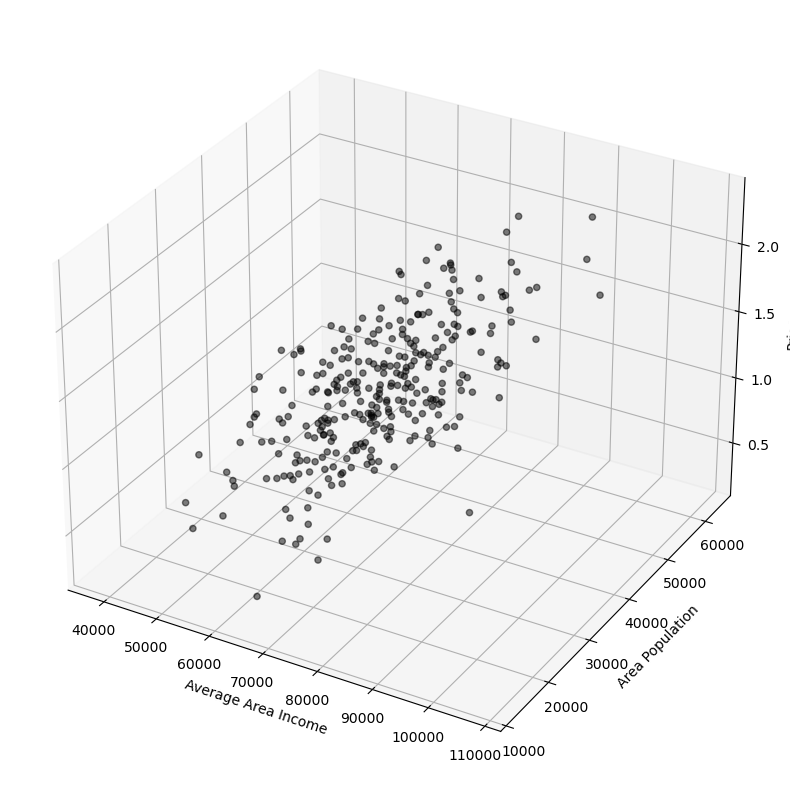

In [16]:
# load dataset
X = df[["average_area_income","area_population"]]
y = df['price']

# define algorithm
from sklearn.linear_model import LinearRegression
Regressor = LinearRegression()
Regressor.fit(X,y)

# prepare dataset for visualization
X = df[["average_area_income","area_population"]]
x_surf, y_surf = np.meshgrid(np.linspace(X.average_area_income.min(),X.average_area_income.max(),100),
                 np.linspace(X.area_population.min(),X.area_population.min(),100))

onlyX = pd.DataFrame({'average_area_income': x_surf.ravel(), 'area_population': y_surf.ravel()})
fittedY= Regressor.predict(onlyX)
fittedY=np.array(fittedY)

# Visualizing data for multiple linear regression
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111,projection = '3d')
ax.plot_surface(x_surf, y_surf, fittedY.reshape(x_surf.shape), color = 'blue',alpha = 0.7  )
ax.scatter(df['average_area_income'], df['area_population'], df['price'], c = 'black', marker = 'o', alpha = 0.5)
ax.set_xlabel('Average Area Income')
ax.set_ylabel('Area Population')
ax.set_zlabel('Price')
plt.show()